TEXT CLASSIFICATION USING NAIVE BAYES ALGORITHM

In [1]:
#loading necessary libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()
from sklearn.datasets import fetch_20newsgroups
data=fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [2]:
#Defining all the categories
categories=['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']
#training the data on these categories
train =fetch_20newsgroups(subset='train',categories=categories)
#testing the data on these categories
test =fetch_20newsgroups(subset='test',categories=categories)

print(len(train.data))
print(train.data[6])

11314
From: bmdelane@quads.uchicago.edu (brian manning delaney)
Subject: Brain Tumor Treatment (thanks)
Reply-To: bmdelane@midway.uchicago.edu
Organization: University of Chicago
Lines: 12

There were a few people who responded to my request for info on
treatment for astrocytomas through email, whom I couldn't thank
directly because of mail-bouncing probs (Sean, Debra, and Sharon).  So
I thought I'd publicly thank everyone.

Thanks! 

(I'm sure glad I accidentally hit "rn" instead of "rm" when I was
trying to delete a file last September. "Hmmm... 'News?' What's
this?"....)

-Brian



In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
#creating a model based multinomial nb
model=make_pipeline(TfidfVectorizer(),MultinomialNB())
model.fit(train.data,train.target)
labels=model.predict(test.data)

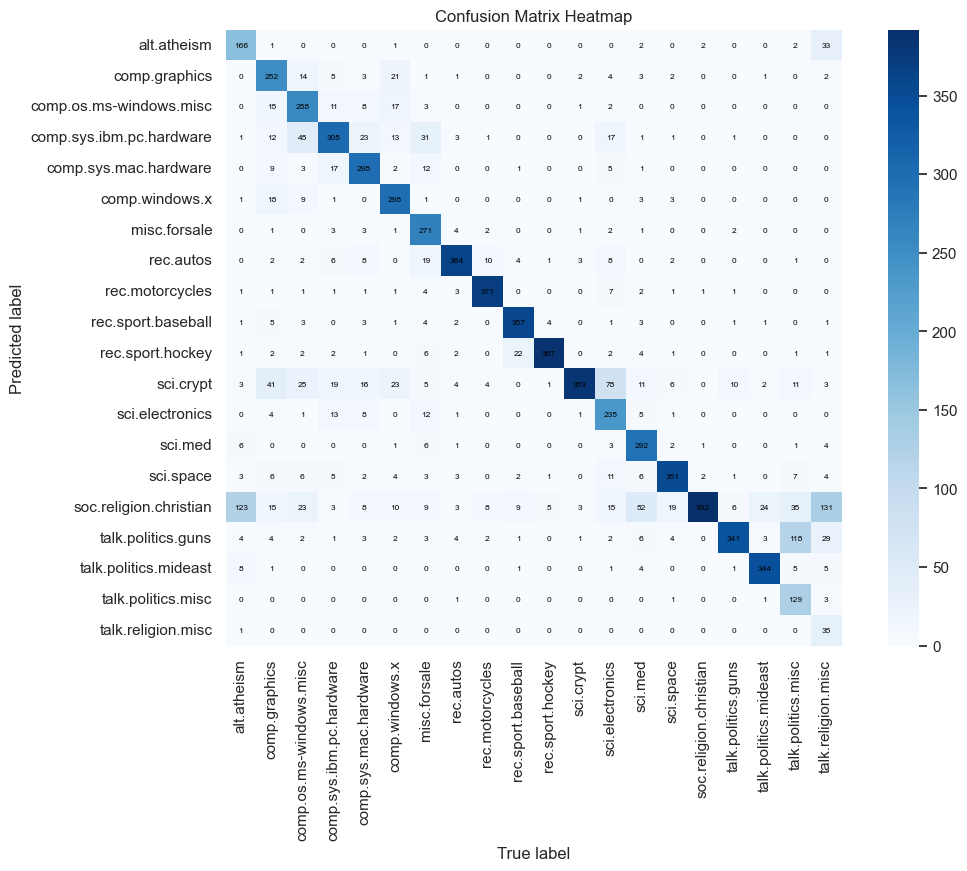

In [4]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
mat = confusion_matrix(test.target, labels)

# Plot heatmap with improved visibility
plt.figure(figsize=(12, 8))  # Increase figure size for clarity
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap="Blues", cbar=True,
            xticklabels=train.target_names, yticklabels=train.target_names,
            annot_kws={"size": 6, "color": "black"})  # Ensure text is readable

plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.yticks(rotation=0)
plt.title("Confusion Matrix Heatmap")
plt.show()


In [16]:
#predicting category on new data
def predict_category(s, model=model, train=train):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [17]:
# Continuous user input loop
while True:
    user_input = input("Enter text to classify (or type 'exit' to quit): ")
    if user_input.lower() == 'exit':
        print("Exiting program.")
        break
    category = predict_category(user_input)
    print(f"Predicted category: {category}\n")

Enter text to classify (or type 'exit' to quit):  bmw


Predicted category: rec.motorcycles



Enter text to classify (or type 'exit' to quit):  bmw bike


Predicted category: rec.motorcycles



Enter text to classify (or type 'exit' to quit):  bmw car


Predicted category: rec.autos



Enter text to classify (or type 'exit' to quit):  exit


Exiting program.
